🎯 Desafio dia 85 — Acompanhamento de Energia em Residências

📂 Dataset: desafio_dia_85_energia_residencias.csv
📥 Clique aqui para baixar o CSV

🔍 Contexto: Uma empresa de energia está analisando o perfil de consumo de residências em diferentes regiões do Brasil. As variáveis incluem o tipo de residência, fonte de energia utilizada e o valor mensal da fatura.

🛠️ Tarefas do desafio

🧹 Tratamento de dados
- Preencha os valores ausentes em consumo_kwh_mes com a mediana.

- Preencha os valores ausentes em valor_fatura com a média.

📊 Análise geral
- Qual é a média de consumo mensal (kWh) por tipo de residência?

- Qual região possui o maior valor médio de fatura?

📈 Visualização de dados
- Crie um gráfico de barras com o valor médio da fatura por tipo de fonte de energia.

🤖 Machine Learning - Regressão
- Crie um modelo para prever o valor_fatura com base em:

regiao, tipo_residencia, fonte_energia, consumo_kwh_mes

Use:

train_test_split

get_dummies

RandomForestRegressor

Avalie com mean_squared_error.



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("desafio_dia_85_energia_residencias.csv")
df.head()

,id_residencia,regiao,tipo_residencia,consumo_kwh_mes,fonte_energia,valor_fatura
0,1,Centro-Oeste,Casa,257.0,Convencional,187.64
1,2,Norte,Sobrado,314.7,Solar,266.29
2,3,Sul,Sobrado,264.0,Convencional,244.02
3,4,Sudeste,Apartamento,446.0,Convencional,382.10
4,5,Sul,Casa,200.2,Convencional,167.24


In [4]:
#Preencha os valores ausentes em consumo_kwh_mes com a mediana.
df["consumo_kwh_mes"] = df["consumo_kwh_mes"].fillna(df["consumo_kwh_mes"].median())
df["consumo_kwh_mes"].isna().sum()

0

In [5]:
#Preencha os valores ausentes em valor_fatura com a média.
df["valor_fatura"] = df["valor_fatura"].fillna(df["valor_fatura"].mean())
df["valor_fatura"].isna().sum()

0

In [7]:
#Qual é a média de consumo mensal (kWh) por tipo de residência?
consumo_mensal_tipo_residencia = df.groupby("tipo_residencia")["consumo_kwh_mes"].mean()
print(consumo_mensal_tipo_residencia)

tipo_residencia
Apartamento    245.832500
Casa           245.559341
Sobrado        260.541139
Name: consumo_kwh_mes, dtype: float64


In [9]:
#Qual região possui o maior valor médio de fatura?
região_fatura = df.groupby("regiao")["valor_fatura"].mean().sort_values(ascending=False)
print(região_fatura)

regiao
Centro-Oeste    198.898274
Norte           198.322252
Nordeste        197.780868
Sul             197.564425
Sudeste         196.022563
Name: valor_fatura, dtype: float64


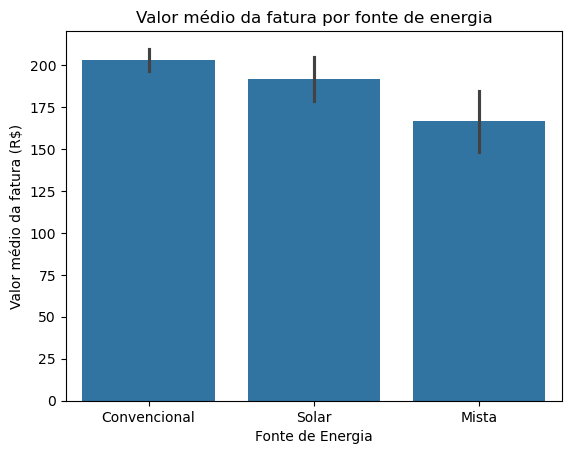

In [13]:
#Crie um gráfico de barras com o valor médio da fatura por tipo de fonte de energia.
sns.barplot(df, x="fonte_energia", y="valor_fatura")
plt.title("Valor médio da fatura por fonte de energia")
plt.ylabel("Valor médio da fatura (R$)")
plt.xlabel("Fonte de Energia")
plt.show()

In [17]:
#Crie um modelo para prever o valor_fatura com base em:
X = df[["regiao", "tipo_residencia", "fonte_energia", "consumo_kwh_mes"]]
y = df["valor_fatura"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

5012.785960052836
